In [1]:
%reload_ext autoreload
%autoreload 2

In this example, we explore the capabilities of FEINN in solving an homogeneous elastic perforated plate. It is subjected to uniform normal traction imder a plane-stress condition. By symmetry, only one quarter of the plate is modelled.

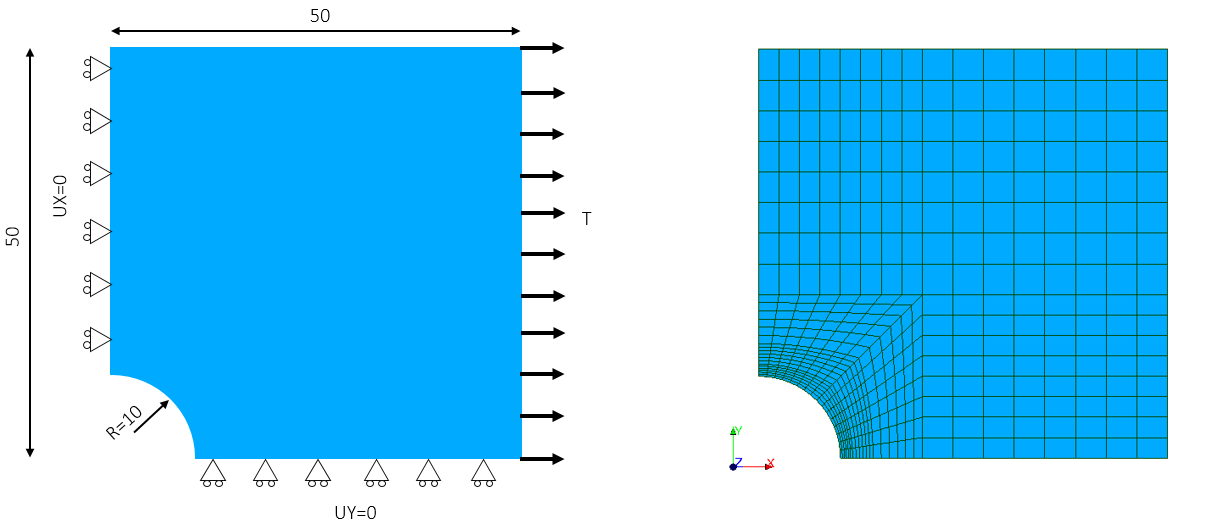

### General Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Mesh definition

In this case, we load a mesh created using SMESH module from Salome Meca platform.

In [3]:
from mesh_utils import Mesh2D

mesh = Mesh2D.from_salome_med(filepath = './PerforatedPlate.med')

Loaded SALOME .med mesh: 531 nodes, 480 elements
Node groups (4): ['left', 'right', 'top', 'bottom']
Element groups (1): ['all_s']


### Dirichlet boundary conditions

In [4]:
from feinn_solver import BoundaryCondition

bcs = {
        'left': BoundaryCondition(dof=1, value=0.0),
        'bottom': BoundaryCondition(dof=2, value=0.0),                
        }

### Define material

In [5]:
from matmodels import LinearElasticPlaneStress

steel = LinearElasticPlaneStress(emod = 200*1e3, nu = 0.30)

matfield = {'all_s': steel}

TypeError: LinearElasticPlaneStress.__init__() got an unexpected keyword argument 'emod'

### von Neumman boundary conditions

In [ ]:
from feinn_solver import EdgeLoad

traction = {
            'right': EdgeLoad(side = 4, ftangential = 0.0, fnormal = 100, reference = "global"),
            }


### Model

In [ ]:
from feinn_solver import NFEA

cantilever_fem = NFEA(mesh = mesh, 
                      bcs = bcs, 
                      matfld = matfield,
                      edge_loads = traction,
                      verbose = True
                      )

[matfld] Assigned: ['all']
[matfld] All 4 elements have assigned material
[edge_load] Applied 2 edge load groups
[BC] Processed 2 Dirichlet condition(s) → 4 total constraint(s)
[BC] Applied Dirichlet BCs → 4 fixed DOFs


In [ ]:
# assign thickness to elements
for elem_i in cantilever_fem.elements:
    elem_i.thickness = 0.10

In [ ]:
cantilever_fem.Fext_total

tensor([    0.0000,  -562.5000,     0.0000, -1125.0000,     0.0000, -1125.0000,
            0.0000, -1125.0000,     0.0000,  -562.5000,     0.0000,  -562.5000,
            0.0000, -1125.0000,     0.0000, -1125.0000,     0.0000, -1125.0000,
            0.0000,  -562.5000])

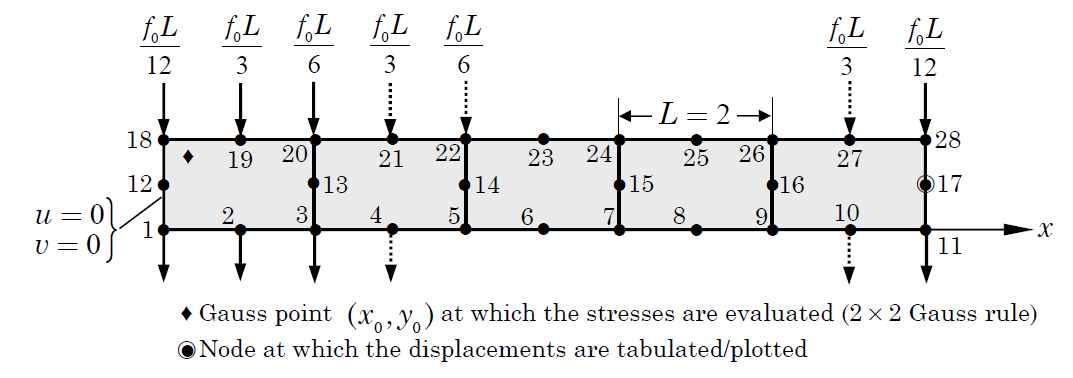

In [ ]:
cantilever_fem.formulation = 'infinitesimal'
cantilever_fem.run_complete(nsteps=1)

[Load] Set load factor = 1.0000.
Iter   1 | du error: 1.00e+00  Res error: 2.37e+02  Energetic error: -2.46e+05
Iter   2 | du error: 1.58e-01  Res error: 2.05e+01  Energetic error: 9.90e+03
Iter   3 | du error: 1.62e-02  Res error: 2.39e-01  Energetic error: 1.28e+01
Iter   4 | du error: 2.69e-03  Res error: 1.44e-03  Energetic error: 2.29e-03
Iter   5 | du error: 5.55e-05  Res error: 8.08e-07  Energetic error: 8.26e-09
Iter   6 | du error: 8.08e-09  Res error: 5.47e-13  Energetic error: 7.19e-19
Converged in 6 iterations


In [ ]:
cantilever_fem.udisp

tensor([ 0.0000,  0.0000, -0.1394, -0.3145, -0.3054, -1.0348, -0.4990, -1.9463,
        -0.6985, -2.9158,  0.0000,  0.0000,  0.0893, -0.3386,  0.0353, -1.0948,
        -0.1167, -2.0223, -0.3080, -2.9953])

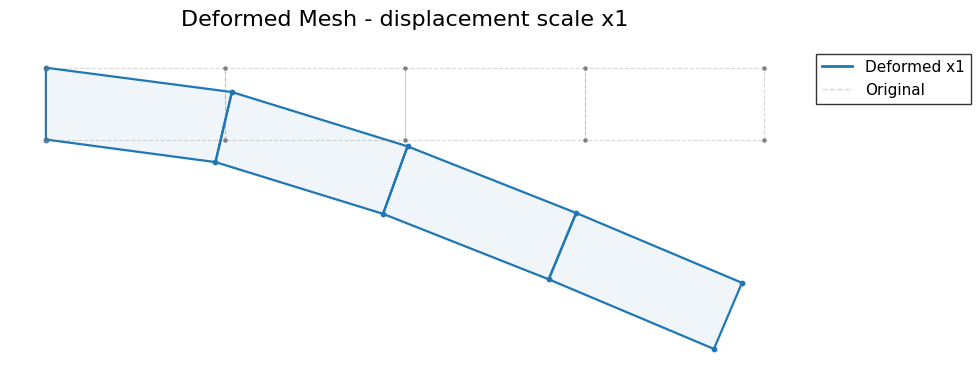

In [ ]:
cantilever_fem.plot_deformed_mesh(scale=1)

In [ ]:
Fint_fem = cantilever_fem._assemble_internal_forces(cantilever_fem.udisp)
Fint_fem

tensor([ 4.3381e+04,  4.2853e+03, -5.4570e-11, -1.1250e+03, -1.4734e-10,
        -1.1250e+03, -2.1737e-10, -1.1250e+03, -1.2257e-10, -5.6250e+02,
        -4.3381e+04,  3.5897e+03,  1.1642e-10, -1.1250e+03,  3.0923e-11,
        -1.1250e+03,  3.6471e-10, -1.1250e+03,  1.2380e-10, -5.6250e+02])